## Post Sentiment Classification Task

In [198]:
import pandas as pd
import numpy as np
import spacy
import sys
import collections 
print(sys.version)
# Version checks
import matplotlib.pyplot as plt


train_data = pd.read_json("https://raw.githubusercontent.com/rpsoft/tad_course/main/reddit_sentiment_train.json")

validation_data = pd.read_json("https://raw.githubusercontent.com/rpsoft/tad_course/main/reddit_sentiment_validation.json")

test_data = pd.read_json("https://raw.githubusercontent.com/rpsoft/tad_course/main/reddit_sentiment_test.json")

3.8.3 (default, May 19 2020, 13:54:14) 
[Clang 10.0.0 ]


In [199]:
nlp = spacy.load('en_core_web_sm', disable=['ner'])
counter = collections.Counter


# Handle the empty entries and replace with NaN

In [200]:
# train_data = train_data.replace(r'^\s*$', np.nan, regex=True)
# validation_data = validation_data.replace(r'^\s*$', np.nan, regex=True)
# test_data = test_data.replace(r'^\s*$', np.nan, regex=True)
train_data

,subreddit,title,id,url,author,body,majority_type,is_first_post,post_depth,in_reply_to,sentiment.polarity,sentiment.subjectivity
0,relationships,My Friend/Crush [22/F] acting weird after I [2...,t1_cy7f317,https://www.reddit.com/r/relationships/comment...,Melodrama_,"It's a sad realization, isn't it?",,False,2,t1_cy7erc5,negative,1.000000
1,relationships,My Friend/Crush [22/F] acting weird after I [2...,t1_cy7hlyf,https://www.reddit.com/r/relationships/comment...,Melodrama_,I told her a couple of minutes ago that I didn...,elaboration,False,2,t1_cy7erc5,neutral,0.483631
2,relationships,My Friend/Crush [22/F] acting weird after I [2...,t1_cy7etrr,https://www.reddit.com/r/relationships/comment...,TreatYoSelves,Leeches don't make good friends.,answer,False,1,t3_3xshx9,positive,0.600000
3,relationships,My Friend/Crush [22/F] acting weird after I [2...,t1_cy7hhpq,https://www.reddit.com/r/relationships/comment...,Melodrama_,I just ended it. Apparently she wasn't a good ...,elaboration,False,2,t1_cy7etrr,positive,0.475000
4,relationships,My Friend/Crush [22/F] acting weird after I [2...,t1_cy7q0qg,https://www.reddit.com/r/relationships/comment...,TreatYoSelves,Good for you! Make sure you stick with it.,appreciation,False,3,t1_cy7hhpq,positive,0.744444
...,...,...,...,...,...,...,...,...,...,...,...,...
12133,reddit.com,"If I announced myself as God right now, would ...",t1_c1zpyd0,https://www.reddit.com/r/reddit.com/comments/h...,,"If you were God, you'd know whether we would b...",answer,False,1,t3_hzu51,neutral,0.000000
12134,reddit.com,"If I announced myself as God right now, would ...",t1_c1zpz7m,https://www.reddit.com/r/reddit.com/comments/h...,TheCannon,If I check my account balance in 5 minutes and...,answer,False,1,t3_hzu51,neutral,0.000000
12135,reddit.com,"If I announced myself as God right now, would ...",t1_c1zq0tl,https://www.reddit.com/r/reddit.com/comments/h...,alllie,I don't know. Can you heal the sick with a tou...,answer,False,1,t3_hzu51,negative,0.637202
12136,reddit.com,"If I announced myself as God right now, would ...",t1_c1zq19j,https://www.reddit.com/r/reddit.com/comments/h...,TheCannon,... Give LeBron James a championship ring?,humor,False,2,t1_c1zq0tl,neutral,0.000000


In [237]:
counter(train_data['majority_type'])

Counter({'': 1100,
         'elaboration': 1638,
         'answer': 5207,
         'appreciation': 674,
         'question': 2016,
         'disagreement': 356,
         'negativereaction': 157,
         'agreement': 406,
         'announcement': 122,
         'humor': 275,
         'other': 187})

In [201]:
##Solution
#Alternate solution:

label_dict = {"very negative": 0, "negative": 1, "neutral": 2, "positive": 3, "very positive": 4}
def create_label(x):
    for key, value in label_dict.items():
      if x == key:
        return value

# Train data
train_data['labels'] = train_data['sentiment.polarity'].apply(create_label)

# Validation Data
validation_data['labels'] = validation_data['sentiment.polarity'].apply(create_label)

#Test data
test_data['labels'] = test_data['sentiment.polarity'].apply(create_label)



In [202]:
#Tokenize
def spacy_tokenize(string):
  tokens = list()
  doc = nlp(string)
  for token in doc:
    tokens.append(token)
  return tokens

#Normalize
def normalize(tokens):
  normalized_tokens = list()
  for token in tokens:
    normalized = token.text.lower().strip()
    if ((token.is_alpha or token.is_digit)):
      normalized_tokens.append(normalized)
  return normalized_tokens

#Tokenize and normalize
def tokenize_normalize(string):
  return normalize(spacy_tokenize(string))
  

In [203]:
train_counter = counter(test_data['labels'])
train_counter

Counter({2: 2514, 3: 1102, 4: 86, 1: 282, 0: 32})

train: Counter({0: 97, 1: 8557, 3: 3231, 4: 253})

valida : Counter({0: 15, 1: 2176, 3: 845, 4: 73})

Counter({0: 32, 1: 2796, 3: 1102, 4: 86})


In [111]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
train_labels = train_data['labels']

# Pass in the tokenizer as the tokenizer to the vectorizer.
# Create a one-hot encoding vectorizer.
one_hot_vectorizer = CountVectorizer(tokenizer=tokenize_normalize, binary=True)
train_features = one_hot_vectorizer.fit_transform(train_data['body'])

In [79]:

validation_labels = validation_data['labels']

validation_features = one_hot_vectorizer.transform(validation_data['body'])

In [80]:
test_labels = test_data['labels']

test_features = one_hot_vectorizer.transform(test_data['body'])

In [309]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score


def evaluation_summary(description, predictions, true_labels):
  print("Evaluation for: " + description)
  precision = precision_score(predictions, true_labels, average="macro")
  recall = recall_score(predictions, true_labels, average= "macro")
  accuracy = accuracy_score(predictions, true_labels)
  f1_macro = fbeta_score(predictions, true_labels, 1, average= "macro") #1 means f_1 measure
  f1_weighted = fbeta_score(predictions, true_labels, 1, average= "weighted") #1 means f_1 measure
  print("Classifier '%s' has Acc=%0.3f P=%0.3f R=%0.3f F1 Macro=%0.3f F1 Weighted=%0.3f" % (description,accuracy,precision,recall,f1_macro, f1_weighted))
  print(classification_report(predictions, true_labels, digits=3, zero_division = 0))
  print('\nConfusion matrix:\n',confusion_matrix(true_labels, predictions)) # Note the order here is true, predicted
  return round(f1_macro,3)


In [83]:
# p = evaluation_summary("Dummy Majority", dummy_mf.predict(test_features), test_labels)

In [311]:
def evaluation_summary_f1_per_class(description, predictions, true_labels):
  f1_per_class = classification_report(predictions, true_labels, digits=3, zero_division = 0, output_dict=True)
  return f1_per_class

In [85]:
from sklearn.dummy import DummyClassifier
# Stratified
dummy_prior = DummyClassifier(strategy='stratified')
dummy_prior.fit(train_features, train_labels)

# print(dummy_prior.score(test_features, test_labels))
dummy_stratified_f1 = evaluation_summary_f1_per_class("Dummy Prior", dummy_prior.predict(test_features), test_labels)
dummy_stratified_f2 = evaluation_summary_f1_per_class("Dummy Prior", dummy_prior.predict(test_features), test_labels)

# Most Frequent
dummy_mf = DummyClassifier(strategy='most_frequent')
dummy_mf.fit(train_features, train_labels)
# print(dummy_mf.score(validation_features, validation_labels))
dummy_mf_f1 = evaluation_summary_f1_per_class("Dummy Majority", dummy_mf.predict(test_features), test_labels)

In [317]:
dummy_stra_score = dummy_prior.score(train_features, train_labels)
dummy_mf_score = dummy_mf.score(train_features, train_labels)
dummy_mf_score

0.6326412918108419

In [86]:
print((validation_labels).shape)

(3109,)


In [112]:
tf_idf_vectorizer = TfidfVectorizer(tokenizer=tokenize_normalize)
train_features_tf = tf_idf_vectorizer.fit_transform(train_data['body'])
validation_features_tf = tf_idf_vectorizer.transform(validation_data['body'])
test_features_tf = tf_idf_vectorizer.transform(test_data['body'])

In [113]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='saga', max_iter = 1000)
lr_model = lr.fit(train_features, train_labels)
logistic_oh_f1 = evaluation_summary_f1_per_class("LR onehot", lr_model.predict(test_features), test_labels)
evaluation_summary("LR onehot", lr_model.predict(test_features), test_labels)
lr_model.score(train_features, train_labels)

Evaluation for: LR onehot
Classifier 'LR onehot' has Acc=0.747 P=0.432 R=0.621 F1 Macro=0.476 F1 Weighted=0.762
              precision    recall  f1-score   support

           0      0.125     0.667     0.211         6
           1      0.245     0.479     0.324       144
           2      0.876     0.778     0.824      2831
           3      0.635     0.711     0.671       984
           4      0.279     0.471     0.350        51

    accuracy                          0.747      4016
   macro avg      0.432     0.621     0.476      4016
weighted avg      0.786     0.747     0.762      4016


Confusion matrix:
 [[   4    5   23    0    0]
 [   1   69  204    8    0]
 [   1   67 2202  231   13]
 [   0    3  385  700   14]
 [   0    0   17   45   24]]


/Users/swaroop/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/swaroop/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


0.9617729444719064

In [186]:
lr_model.score(train_features, train_labels)

0.9617729444719064

In [89]:
#Logistic Regression TF-IDF

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='saga', max_iter = 1000)
lr_model = lr.fit(train_features_tf, train_labels)
logistic_tidf_f1 = evaluation_summary_f1_per_class("LR TF-IDF", lr_model.predict(test_features_tf), test_labels)
evaluation_summary("LR TF-IDF", lr_model.predict(test_features_tf), test_labels)

Evaluation for: LR TF-IDF
Classifier 'LR TF-IDF' has Acc=0.748 P=0.396 R=0.705 F1 Macro=0.434 F1 Weighted=0.770
              precision    recall  f1-score   support

           0      0.031     1.000     0.061         1
           1      0.181     0.481     0.263       106
           2      0.902     0.765     0.828      2965
           3      0.599     0.732     0.659       902
           4      0.267     0.548     0.359        42

    accuracy                          0.748      4016
   macro avg      0.396     0.705     0.434      4016
weighted avg      0.808     0.748     0.770      4016


Confusion matrix:
 [[   1    7   24    0    0]
 [   0   51  222    9    0]
 [   0   47 2268  189   10]
 [   0    1  432  660    9]
 [   0    0   19   44   23]]


/Users/swaroop/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/swaroop/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [187]:
lr_model.score(train_features, train_labels)

0.9617729444719064

In [312]:
#SVC 
from sklearn.svm import SVC

svm_classifier = SVC()
svm_model = svm_classifier.fit(train_features, train_labels)
svc_oh_f1 = evaluation_summary_f1_per_class("LR One hot", lr_model.predict(test_features), test_labels)

In [92]:
# svm model score
svm_model.score(train_features, train_labels)

0.8623331685615423

In [313]:
svc_oh_f1['accuracy']

0.7467629482071713

In [93]:
# Decision trees for multi-class classification 
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf_model = clf.fit(train_features, train_labels)
decision_oh_f1 = evaluation_summary_f1_per_class("Decision Trees One-Hot", clf.predict(test_features), test_labels)

In [94]:
#clf_model - one hot
clf_model.score(train_features, train_labels)

0.9992585269401878

In [95]:
# Decision trees for multi-class classification 
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf_model = clf.fit(train_features_tf, train_labels)
decision_tf_idf_f1 = evaluation_summary_f1_per_class("Decision Trees Tf-IDF", clf.predict(test_features_tf), test_labels)

In [96]:
#clf_model - tf-idf
clf_model.score(train_features, train_labels)

0.9335969681990444

In [97]:
!pip3 install termtables

In [323]:
import termtables as tt

tt.print(
    [["DummyClassifier Stratified", dummy_stratified_f1['accuracy'], dummy_stratified_f1['weighted avg']['precision'], dummy_stratified_f1['weighted avg']['recall'], dummy_stratified_f1['weighted avg']['f1-score'], dummy_stratified_f1['macro avg']['f1-score']], 
    ["DummyClassifier Most Frequent", dummy_mf_f1['accuracy'], dummy_mf_f1['weighted avg']['precision'], dummy_mf_f1['weighted avg']['recall'], dummy_mf_f1['weighted avg']['f1-score'], dummy_mf_f1['macro avg']['f1-score']], 
    ["Logistic Regression One-Hot", logistic_oh_f1['accuracy'], logistic_oh_f1['weighted avg']['precision'], logistic_oh_f1['weighted avg']['recall'], logistic_oh_f1['weighted avg']['f1-score'], logistic_oh_f1['macro avg']['f1-score']], 
    ["Logistic Regression Tf- IDF", logistic_tidf_f1['accuracy'], logistic_tidf_f1['weighted avg']['precision'], logistic_tidf_f1['weighted avg']['recall'], logistic_tidf_f1['weighted avg']['f1-score'], logistic_tidf_f1['macro avg']['f1-score']], 
    ["SVC with One-Hot", svc_oh_f1['accuracy'], svc_oh_f1['weighted avg']['precision'], svc_oh_f1['weighted avg']['recall'], svc_oh_f1['weighted avg']['f1-score'], svc_oh_f1['macro avg']['f1-score']], 
    ['\033[1m'+"DecisionTree One Hot", decision_oh_f1['accuracy'], decision_oh_f1['weighted avg']['precision'], decision_oh_f1['weighted avg']['recall'], decision_oh_f1['weighted avg']['f1-score'], str(decision_oh_f1['macro avg']['f1-score'])+'\033[0m'], 
    ["DecisionTree Tf Idf", decision_tf_idf_f1['accuracy'], decision_tf_idf_f1['weighted avg']['precision'], decision_tf_idf_f1['weighted avg']['recall'], str(decision_tf_idf_f1['weighted avg']['f1-score']), str(decision_tf_idf_f1['macro avg']['f1-score'])]],
    header=["Type (max - higlighted)", "Accuracy (max - higlighted)", "weighted-precision", "recall", "f1-score-weighted", "f1-score-macro"],
    style=tt.styles.ascii_thin_double,
)


+-------------------------------+-----------------------------+--------------------+--------------------+--------------------+---------------------+
| Type (max - higlighted)       | Accuracy (max - higlighted) | weighted-precision | recall             | f1-score-weighted  | f1-score-macro      |
+===============================+=============================+====================+====================+====================+=====================+
| DummyClassifier Stratified    | 0.4723605577689243          | 0.4742816275902377 | 0.4723605577689243 | 0.4732895502619004 | 0.1941524028635974  |
+-------------------------------+-----------------------------+--------------------+--------------------+--------------------+---------------------+
| DummyClassifier Most Frequent | 0.625996015936255           | 1.0                | 0.625996015936255  | 0.7699846860643186 | 0.15399693721286373 |
+-------------------------------+-----------------------------+--------------------+--------------------+-

In [99]:
# Decision trees for multi-class classification 
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(train_features, train_labels)
predictions = clf.predict(test_features)
decision_oh_f1_perclass_dict = evaluation_summary_f1_per_class("Decision Trees One-Hot", clf.predict(test_features), test_labels)

In [184]:
decision_oh_f1_perclass_dict

{'0': {'precision': 0.1875,
  'recall': 0.21428571428571427,
  'f1-score': 0.19999999999999998,
  'support': 28},
 '1': {'precision': 0.4078014184397163,
  'recall': 0.41818181818181815,
  'f1-score': 0.41292639138240567,
  'support': 275},
 '2': {'precision': 0.7808273667462211,
  'recall': 0.7725304998032271,
  'f1-score': 0.7766567754698318,
  'support': 2541},
 '3': {'precision': 0.5852994555353902,
  'recall': 0.5863636363636363,
  'f1-score': 0.5858310626702997,
  'support': 1100},
 '4': {'precision': 0.3372093023255814,
  'recall': 0.4027777777777778,
  'f1-score': 0.3670886075949367,
  'support': 72},
 'accuracy': 0.6867529880478087,
 'macro avg': {'precision': 0.45972750860938183,
  'recall': 0.4788278892824347,
  'f1-score': 0.46850056742349483,
  'support': 4016},
 'weighted avg': {'precision': 0.6896379979654981,
  'recall': 0.6867529880478087,
  'f1-score': 0.6881185689201119,
  'support': 4016}}

very negative 0
negative 1
neutral 2
positive 3
very positive 4


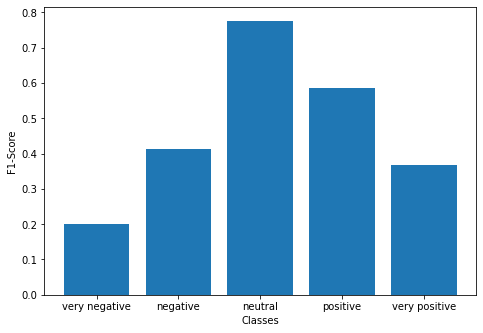

In [188]:
# Plotting
polarity_labels = list(label_dict.keys())


f1_scores = []
# print(decision_oh_f1)
for k in list(label_dict.keys()):
  print(k,str(label_dict[k]))
  f1_scores.append(decision_oh_f1_perclass_dict[str(label_dict[k])]['f1-score'])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(polarity_labels, f1_scores)
plt.xlabel("Classes")
plt.ylabel("F1-Score")
plt.show()



**Trying CNN**

In [103]:
# 
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 1000)
lr_model = lr.fit(train_features_tf, train_labels)
logistic_Q3= evaluation_summary("LR TF-IDF", lr_model.predict(test_features_tf), test_labels)

Evaluation for: LR TF-IDF
Classifier 'LR TF-IDF' has Acc=0.741 P=0.405 R=0.536 F1 Macro=0.433 F1 Weighted=0.758
              precision    recall  f1-score   support

           0      0.031     0.333     0.057         3
           1      0.206     0.430     0.278       135
           2      0.880     0.771     0.822      2870
           3      0.615     0.714     0.661       950
           4      0.291     0.431     0.347        58

    accuracy                          0.741      4016
   macro avg      0.405     0.536     0.433      4016
weighted avg      0.786     0.741     0.758      4016


Confusion matrix:
 [[   1    8   23    0    0]
 [   1   58  215    8    0]
 [   1   66 2213  220   14]
 [   0    3  402  678   19]
 [   0    0   17   44   25]]


/Users/swaroop/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/swaroop/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [42]:
train_data[['subreddit', 'body']]

,subreddit,body
0,relationships,"It's a sad realization, isn't it?"
1,relationships,I told her a couple of minutes ago that I didn...
2,relationships,Leeches don't make good friends.
3,relationships,I just ended it. Apparently she wasn't a good ...
4,relationships,Good for you! Make sure you stick with it.
...,...,...
12133,reddit.com,"If you were God, you'd know whether we would b..."
12134,reddit.com,If I check my account balance in 5 minutes and...
12135,reddit.com,I don't know. Can you heal the sick with a tou...
12136,reddit.com,... Give LeBron James a championship ring?


In [122]:
from sklearn.base import BaseEstimator, TransformerMixin

class ItemSelector(BaseEstimator, TransformerMixin):
    """For data grouped by feature, select subset of data at a provided key.    """

    def __init__(self, key):
        self.key = key

    def fit(self, x, y=None):
        return self

    def transform(self, data_dict):
        return data_dict[self.key]

In [124]:
# train_features_with_subreddit = one_hot_vectorizer.fit_transform(train_data[['subreddit','body']])
# test_features_with_subreddit = one_hot_vectorizer.fit_transform(test_data[['subreddit','body']])

In [246]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier

from sklearn import metrics


# Use FeatureUnion to combine the features from text and summary
prediction_pipeline = Pipeline([
        ('union', FeatureUnion(
          transformer_list=[
#             ('majority_type', Pipeline([
#               ('selector', ItemSelector(key='majority_type')),
#               ('tf-idf', TfidfVectorizer(tokenizer=tokenize_normalize, sublinear_tf = True, max_features = 2000)), 
#               ])),
            ('subjectivity', Pipeline([
              ('selector', ItemSelector(key='sentiment.subjectivity')),
#               ('tf-idf', TfidfVectorizer(sublinear_tf = True, max_features = 2000)), 
              ])),
            ('body', Pipeline([
              ('selector', ItemSelector(key='body')),
              ('tf-idf', TfidfVectorizer(tokenizer=tokenize_normalize, sublinear_tf = True, max_features = 2000)), 
              ])),
        ])
        )
    ])

In [ ]:
## All important step to set your transformers and vectorizers.
numeric_features = ['sentiment.subjectivity']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['author']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

text_features = ['title','body']
text_transformer = TfidfVectorizer(sublinear_tf=True, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('tfidf_1', text_transformer, 'title'),
        ('tfidf_2', text_transformer, 'description')],
                    remainder='drop')

In [ ]:
lr = LogisticRegression(solver = 'saga', penalty='l1', max_iter = 1500, C=10)
combined_model = lr.fit(tf_idf_train_features,train_labels)
evaluation_summary("LR TFIDF", lr.predict(tf_idf_test_features), test_labels)

In [169]:
tf_idf_vectorizer = TfidfVectorizer(tokenizer=tokenize_normalize, sublinear_tf = True, max_features = 2000)
train_features_tf_mod = tf_idf_vectorizer.fit_transform(train_data['body'])
validation_features_tf_mod = tf_idf_vectorizer.transform(validation_data['body'])
test_features_tf_mod = tf_idf_vectorizer.transform(test_data['body'])

In [212]:
lr_tuned_vec = LogisticRegression(solver='saga', penalty='l1', max_iter = 1500, C=10)

In [213]:
combined_model = lr_tuned_vec.fit(train_features_tf_mod,train_labels)
evaluation_summary("LR TFIDF", lr_tuned_vec.predict(test_features_tf_mod), test_labels)

Evaluation for: LR TFIDF
Classifier 'LR TFIDF' has Acc=0.774 P=0.576 R=0.606 F1 Macro=0.589 F1 Weighted=0.778
              precision    recall  f1-score   support

           0      0.469     0.500     0.484        30
           1      0.418     0.546     0.474       216
           2      0.863     0.820     0.841      2646
           3      0.697     0.741     0.718      1036
           4      0.430     0.420     0.425        88

    accuracy                          0.774      4016
   macro avg      0.576     0.606     0.589      4016
weighted avg      0.784     0.774     0.778      4016


Confusion matrix:
 [[  15    6   11    0    0]
 [   8  118  148    7    1]
 [   7   88 2170  228   21]
 [   0    4  301  768   29]
 [   0    0   16   33   37]]


/Users/swaroop/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/swaroop/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


0.589

# Hyper parameter Tuning

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
 
prediction_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(tokenizer=tokenize_normalize, sublinear_tf = True, max_features=2000)),
    ('clfpipe', LogisticRegression(solver='saga', max_iter=3000)),
])
params = {
#     'tfidf__max_features': (2000, 2500, 3000),
#     'clfpipe__penalty' : ('l1', 'l2', 'none'),
    'clfpipe__C': (0.01, 0.1, 1, 10, 100),
    
}
 
grid_search = GridSearchCV(prediction_pipeline, param_grid=params, n_jobs=1, verbose=1, scoring='f1_macro', cv=2)
print("Performing grid search...")
print("pipeline:", [name for name, _ in prediction_pipeline.steps])
print("parameters:")
print(params)
grid_search.fit(train_data_mod['body'], train_labels_mod)
 
print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(params.keys()):
  print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['tfidf', 'clfpipe']
parameters:
{'clfpipe__C': (0.01, 0.1, 1, 10, 100)}
Fitting 2 folds for each of 5 candidates, totalling 10 fits


# Test on Validation/development set

In [286]:
class_0 = validation_data[validation_data['labels'] == 0]
class_1 = validation_data[validation_data['labels'] == 1]
class_3 = validation_data[validation_data['labels'] == 3]
class_4 = validation_data[validation_data['labels'] == 4]

In [2]:
train_data_mod = train_data.append([class_0, class_1, class_3, class_4],ignore_index=True)
train_labels_mod = train_data_mod['labels']

NameError: name 'train_data' is not defined

In [288]:
train_data_mod['labels'].value_counts()

2    7679
3    4076
1    1093
4     326
0     112
Name: labels, dtype: int64

In [289]:
## All important step to set your transformers and vectorizers.
numeric_features = ['sentiment.subjectivity']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
#     ('scaler', StandardScaler())
    ])

categorical_features = ['majority_type']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

text_features = ['title','body']
text_transformer = TfidfVectorizer(tokenizer=tokenize_normalize, sublinear_tf=True, max_features=2000)


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
#         ('tfidf_1', text_transformer, 'title'),
#         ('tfidf_2', text_transformer, 'majority_type'),
        ('tfidf_3', text_transformer, 'body')],
                    remainder='drop')

# Test on Validation/development set

In [ ]:
# Train with the above parameters
classif = LogisticRegression(solver='saga', penalty='l2' , max_iter = 2000, C=10)

clf = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classif)])
clf.fit(train_data_mod, train_labels_mod)
# valid_pred = clf.predict(validation_data)
# evaluation_summary("Logistic", valid_pred, validation_labels)

# print(metrics.classification_report(valid_labels, valid_pred, zero_division=0))

In [310]:
test_pred = clf.predict(test_data)
evaluation_summary("Logistic", test_pred, test_labels)
plot_confusion_matrix(clf, test_pred, test_labels, cmap=plt.cm.Blues)

Evaluation for: Logistic
Classifier 'Logistic' has Acc=0.801 P=0.609 R=0.673 F1 Macro=0.636 F1 Weighted=0.803
              precision    recall  f1-score   support

           0      0.500     0.640     0.561        25
           1      0.472     0.556     0.511       239
           2      0.866     0.869     0.868      2506
           3      0.775     0.723     0.748      1182
           4      0.430     0.578     0.493        64

    accuracy                          0.801      4016
   macro avg      0.609     0.673     0.636      4016
weighted avg      0.807     0.801     0.803      4016


Confusion matrix:
 [[  16   10    0    5    1]
 [   5  133  112   28    4]
 [   1   80 2178  247    8]
 [   3   15  216  854   14]
 [   0    1    0   48   37]]


/Users/swaroop/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/swaroop/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


IndexError: tuple index out of range

In [306]:
label_dict

{'very negative': 0,
 'negative': 1,
 'neutral': 2,
 'positive': 3,
 'very positive': 4}

In [1]:
train_data_mod[train_data_mod['labels'] == 4]['body']

NameError: name 'train_data_mod' is not defined

In [292]:
classif = LogisticRegression(solver='saga', penalty='l1' , max_iter = 2000, C=10)
 
clf = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', classif)])
 
clf.fit(train_data, train_labels)
test_pred = clf.predict(test_data)
evaluation_summary("Logistic", test_pred, test_labels)
print(metrics.classification_report(test_labels, test_pred, zero_division=0))
plot_confusion_matrix(clf, test_pred, test_labels, cmap=plt.cm.Blues,)


/Users/swaroop/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


Evaluation for: Logistic
Classifier 'Logistic' has Acc=0.806 P=0.613 R=0.628 F1 Macro=0.620 F1 Weighted=0.807
              precision    recall  f1-score   support

           0      0.500     0.516     0.508        31
           1      0.514     0.566     0.539       256
           2      0.878     0.868     0.873      2545
           3      0.755     0.756     0.755      1101
           4      0.419     0.434     0.426        83

    accuracy                          0.806      4016
   macro avg      0.613     0.628     0.620      4016
weighted avg      0.809     0.806     0.807      4016


Confusion matrix:
 [[  16   11    0    4    1]
 [   7  145  102   22    6]
 [   6   81 2208  200   19]
 [   1   13  235  832   21]
 [   1    6    0   43   36]]
              precision    recall  f1-score   support

           0       0.52      0.50      0.51        32
           1       0.57      0.51      0.54       282
           2       0.87      0.88      0.87      2514
           3       0.76

/Users/swaroop/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/Users/swaroop/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


# majority_type + body+ subjectivity with scalar = 0.60

# majority_type + body + subjectivity without scalar = 0.62

# Majority + body = 0.58

# Majority + title+ body = 0.53



# Subjectivity + Body = 0.625

# Sub + majority + body = 0.624